# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

## Introduction
In this notebook, we perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

## Descriptive Analytics for Numerical Columns
**Objective:** Compute and analyze basic statistical measures for numerical columns in the dataset.

In [1]:
# Load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace 'sales_discounts.csv' with your actual file name
df = pd.read_csv('sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [2]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols


['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [3]:
# Descriptive statistics
# Compute mean, median, std using agg
desc_stats = df[numerical_cols].agg(['mean', 'median', 'std'])

# Compute mode separately
modes = df[numerical_cols].mode().iloc[0]  # take first mode if multiple

# Append mode to the stats DataFrame
desc_stats.loc['mode'] = modes

desc_stats


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
median,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
mode,3.000000,400.000000,24300.000000,5.007822,69.177942,326.974801


## Data Visualization

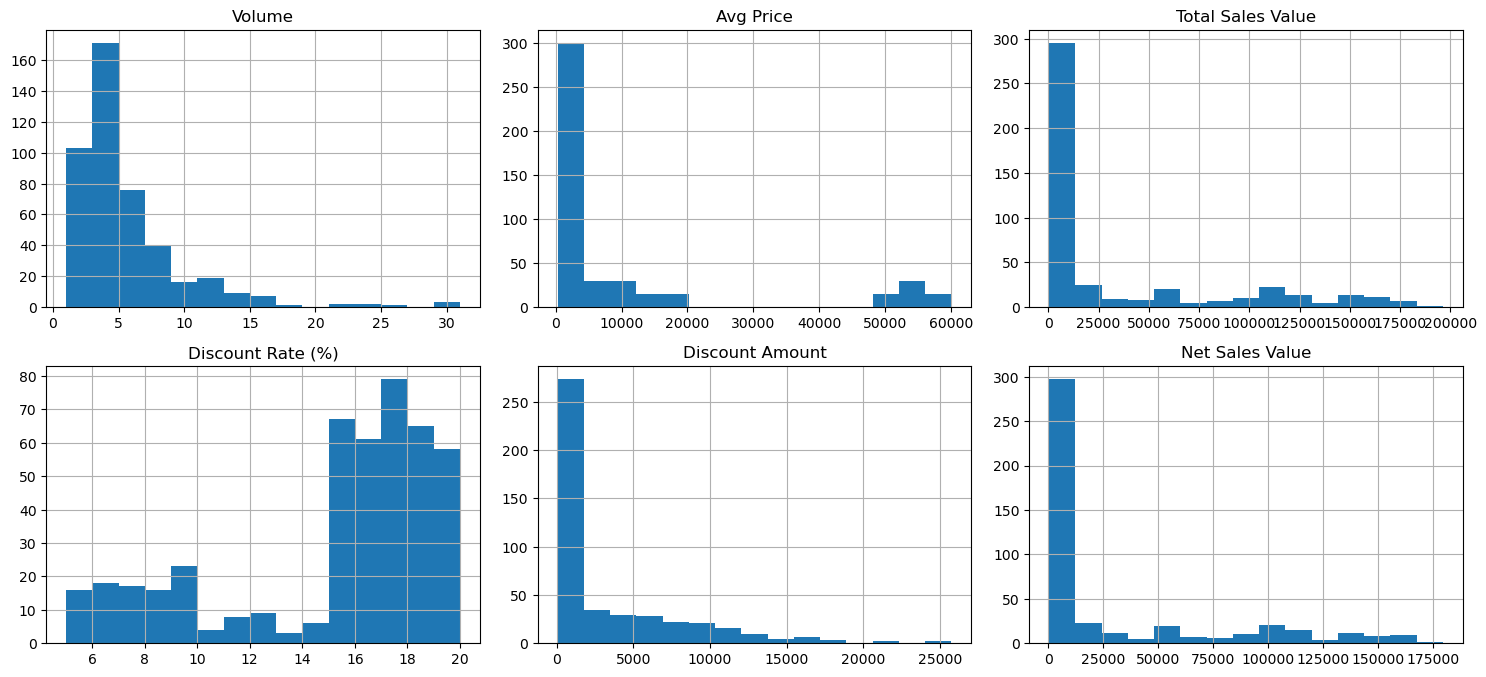

In [4]:
# Histograms for numerical columns
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

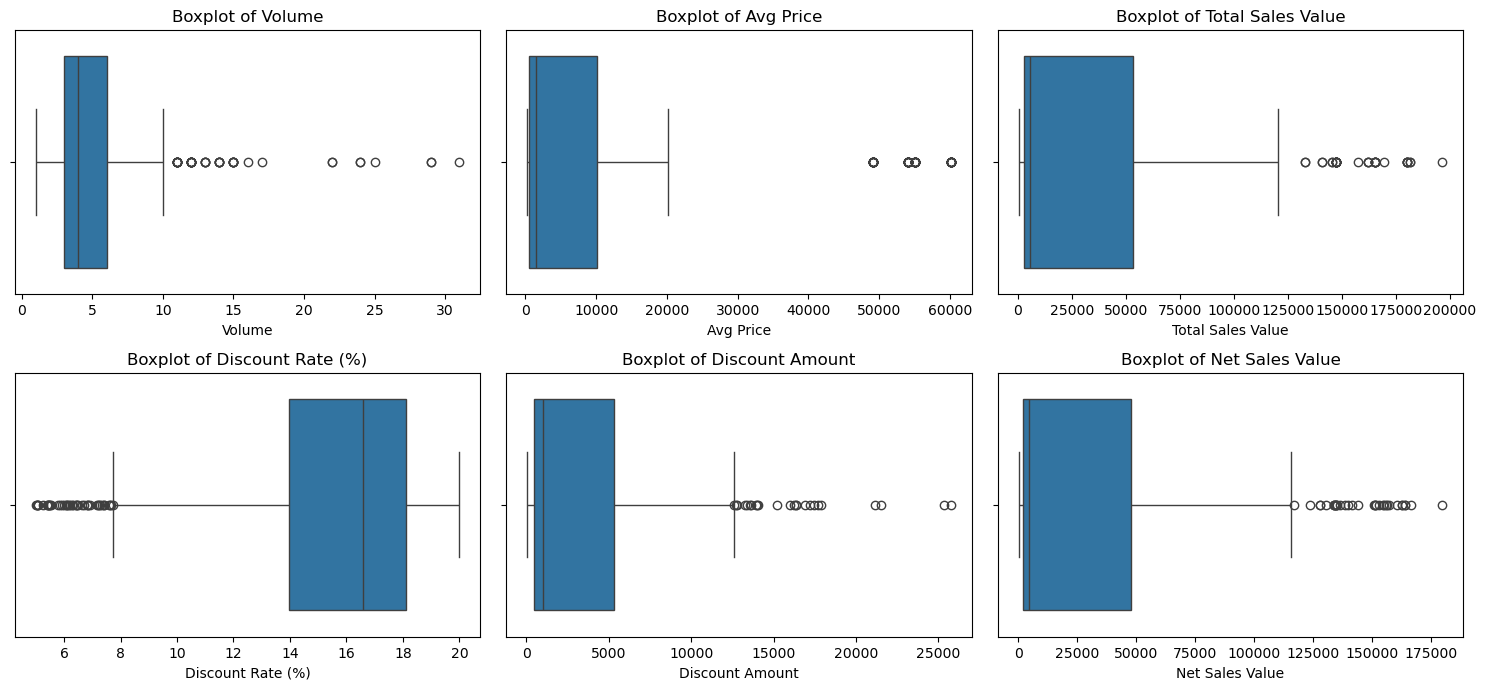

In [5]:
# Boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

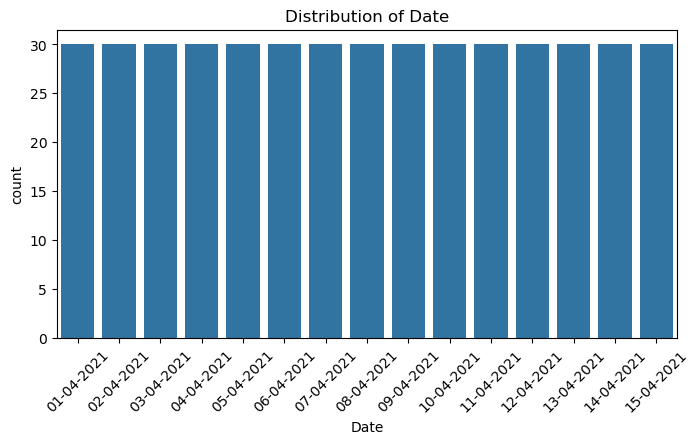

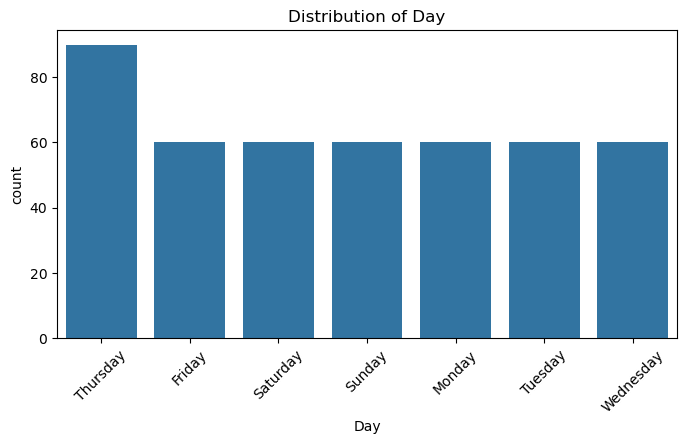

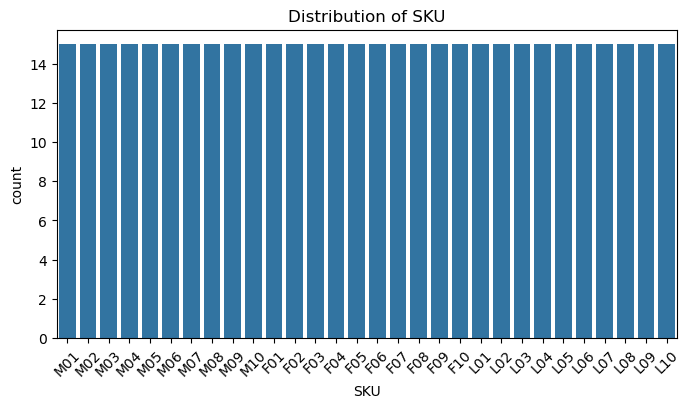

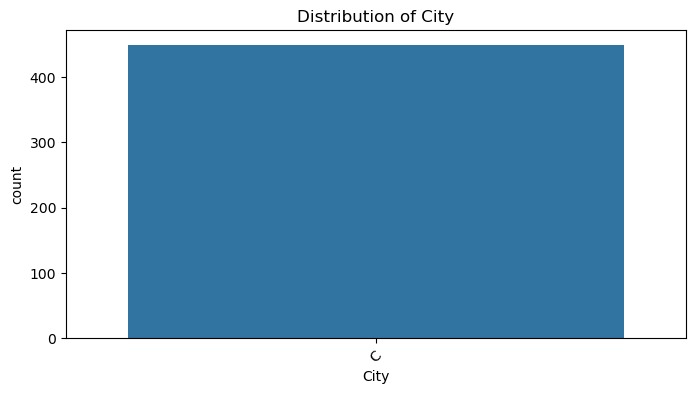

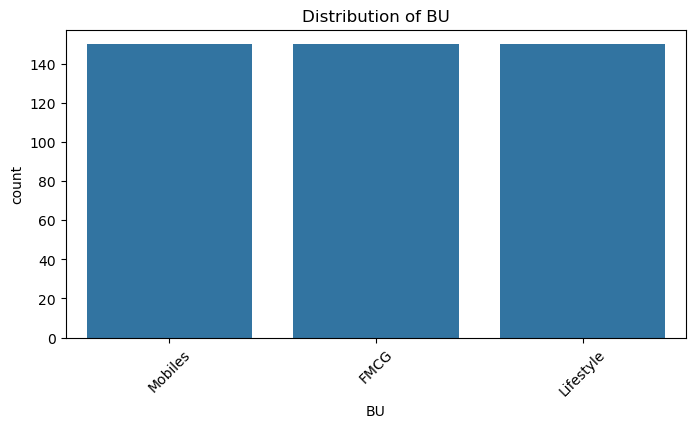

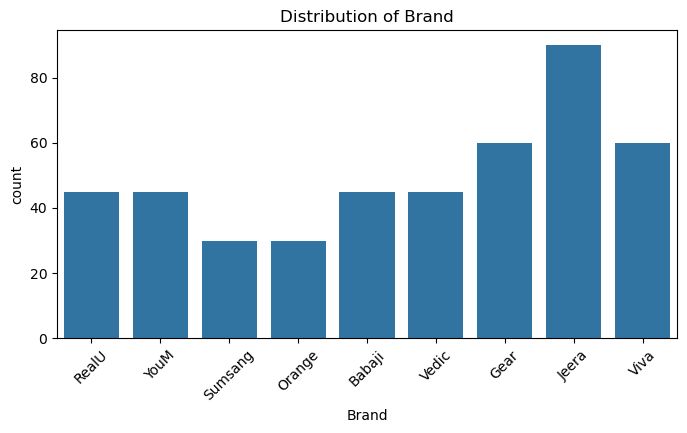

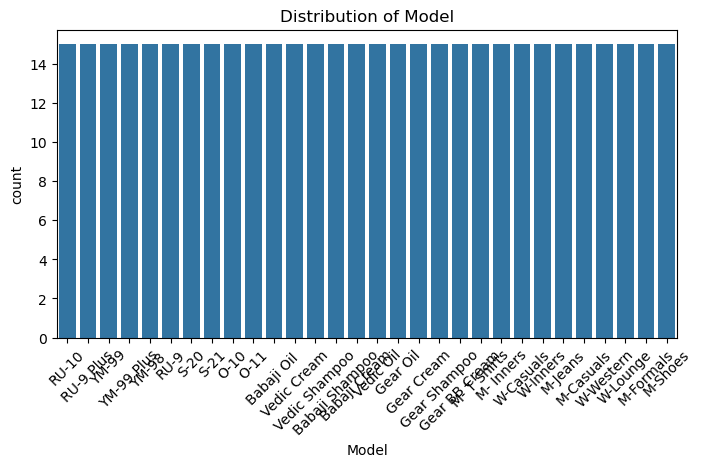

In [11]:
# Identify categorical columns and create bar charts
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Standardization of Numerical Variables
**Objective:** Scale numerical variables using z-score normalization.

In [6]:
# Before standardization
df[numerical_cols].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [7]:
# Apply z-score normalization
df_standardized = df.copy()
df_standardized[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()
df_standardized[numerical_cols].describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,4.934325e-17,3.947460e-17,1.184238e-17,-3.552714e-17,-5.921189e-17,3.947460e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.610229e-01,-5.621398e-01,-6.611811e-01,-2.404259e+00,-7.266945e-01,-6.501345e-01
25%,-4.883887e-01,-5.524605e-01,-6.156681e-01,-2.819928e-01,-6.399340e-01,-6.096839e-01
50%,-2.520716e-01,-4.979801e-01,-5.563034e-01,3.370428e-01,-5.227531e-01,-5.562833e-01
75%,2.205626e-01,-1.954841e-02,3.836378e-01,7.011977e-01,4.368156e-01,3.749370e-01
max,6.128490e+00,2.745953e+00,3.217313e+00,1.146084e+00,4.964968e+00,3.214958e+00


## Conversion of Categorical Data into Dummy Variables
**Objective:** Apply one-hot encoding to categorical columns.

In [13]:
# Identify categorical columns from the standardized dataframe
categorical_cols = df_standardized.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encode
df_encoded = pd.get_dummies(df_standardized, columns=categorical_cols, drop_first=True)

df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [12]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


## Conclusion
- We computed and analyzed basic statistical measures for numerical columns.
- Visualized data distributions and identified outliers using histograms and boxplots.
- Standardized numerical data for better modeling performance.
- Transformed categorical columns using one-hot encoding to prepare data for machine learning.